<a href="https://colab.research.google.com/github/Arnyme/Arnyme/blob/main/course_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ratings = pd.read_csv('ratings.csv')

In [ ]:
courses = pd.read_csv('courses.csv')

In [ ]:
courses.head()

,courseId,Faculty,Course,Level,Related_Interests
0,1,Accounting Banking and Finance,Bachelor of Accounting (B.Acc),Undergraduate,Financial Analysis|Auditing|Accounting|Corpora...
1,2,Accounting Banking and Finance,Bachelor of Banking and Finance (BBF),Undergraduate,Investment Strategies|Financial Management|Ban...
2,3,Accounting Banking and Finance,Ordinary Diploma in Banking (ODB),Diploma,Commercial Banking|Retail Banking|Financial Se...
3,4,Accounting Banking and Finance,Ordinary Diploma in Accounting (ODA),Diploma,Financial Reporting|Cost Accounting|Bookkeepin...
4,5,Accounting Banking and Finance,Basic Technician Certificate in Accountancy (B...,Undergraduate,Bookkeeping|Tax Preparation|Accounting|Financi...


In [ ]:
ratings.head()

,userId,courseId,rating,timestamp
0,1,12,1.5,9/6/2024 14:21
1,2,41,3.0,9/6/2024 14:21
2,3,26,3.0,9/6/2024 14:21
3,4,42,1.0,9/6/2024 14:21
4,5,21,4.5,9/6/2024 14:21


In [ ]:
n_ratings = len(ratings)
n_courses = ratings['courseId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique courses: {n_courses}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per course: {round(n_ratings/n_courses, 2)}")

Number of ratings: 200000
Number of unique courses: 42
Number of unique users: 200000
Average number of ratings per user: 1.0
Average number of ratings per course: 4761.9


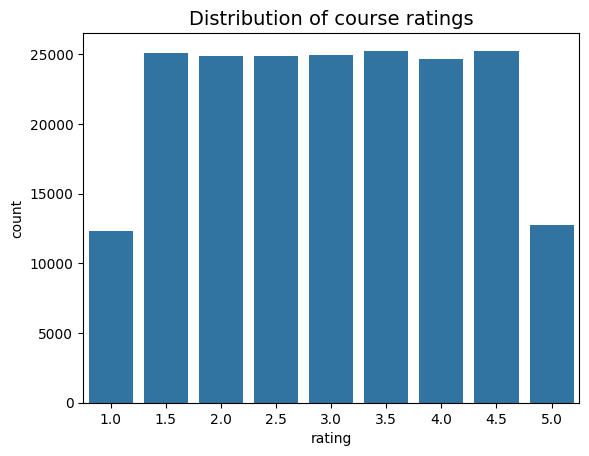

In [ ]:
sns.countplot(x='rating', data=ratings)
plt.title("Distribution of course ratings", fontsize=14)
plt.show()

In [ ]:
print(f"Mean global rating: {round(ratings['rating'].mean(),2)}.")

Mean global rating: 3.01.


In [ ]:
mean_ratings = ratings.groupby('userId')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean rating per user: 3.01.


In [ ]:
ratings['courseId'].value_counts()

courseId
32    4913
11    4883
16    4879
14    4860
7     4854
42    4851
31    4838
39    4829
33    4827
1     4820
12    4811
3     4802
30    4797
37    4792
28    4790
25    4789
26    4787
15    4784
17    4783
23    4776
2     4774
13    4754
8     4754
29    4748
24    4745
36    4742
10    4737
20    4728
6     4720
19    4720
35    4714
27    4712
21    4706
9     4700
34    4693
4     4679
38    4671
40    4653
22    4652
41    4651
18    4648
5     4634
Name: count, dtype: int64

In [ ]:
course_ratings = ratings.merge(courses, on='courseId')
# course_ratings
course_ratings['Course'].value_counts()[0:10]

Course
MSc in Insurance and Actuarial Science (MSc IAS)                                    4913
Basic Technician Certificate in Computing and Information Technology (BTCC & IT)    4883
Ordinary Diploma in Social Protection (ODSP)                                        4879
Bachelor of Science in Social Protection (BSc SP)                                   4860
Bachelor of Science in Information Technology (BSc IT)                              4854
Basic Technician Certificate in Computing and Information Technology                4851
Postgraduate Diploma in Tax Management (PGDTM)                                      4838
Certificate in Computer and Information Technology                                  4829
MSc in Social Protection Policy and Development (MSc SPPD)                          4827
Bachelor of Accounting (B.Acc)                                                      4820
Name: count, dtype: int64

In [ ]:
mean_ratings = ratings.groupby('courseId')[['rating']].mean()
lowest_rated = mean_ratings['rating'].idxmin()
# mean_ratings
courses[courses['courseId'] == lowest_rated]

,courseId,Faculty,Course,Level,Related_Interests
4,5,Accounting Banking and Finance,Basic Technician Certificate in Accountancy (B...,Undergraduate,Bookkeeping|Tax Preparation|Accounting|Financi...


In [ ]:
highest_rated = mean_ratings['rating'].idxmax()

courses[courses['courseId'] == highest_rated]

,courseId,Faculty,Course,Level,Related_Interests
39,40,Certificate Programs,Certificate in Insurance and Social Protection,Certificate,Insurance Policies|Social Policy|Risk Assessme...


In [ ]:
ratings[ratings['courseId']==highest_rated]

,userId,courseId,rating,timestamp
21,22,40,5.0,9/6/2024 14:21
70,71,40,1.5,9/6/2024 14:21
78,79,40,4.0,9/6/2024 14:21
85,86,40,2.5,9/6/2024 14:21
87,88,40,3.0,9/6/2024 14:21
...,...,...,...,...
199902,199903,40,3.5,9/6/2024 14:21
199904,199905,40,3.0,9/6/2024 14:21
199928,199929,40,4.5,9/6/2024 14:21
199985,199986,40,3.5,9/6/2024 14:21


In [ ]:
course_stats = ratings.groupby('courseId')['rating'].agg(['count', 'mean'])
course_stats.head()

,count,mean
courseId,,
1,4820,3.008817
2,4774,3.020947
3,4802,2.982403
4,4679,2.988032
5,4634,2.968602


In [ ]:
C = course_stats['count'].mean()
m = course_stats['mean'].mean()

print(f"Average number of ratings for a given course: {C:.2f}")
print(f"Average rating for a given course: {m:.2f}")

def bayesian_avg(ratings):
    bayesian_avg = (C*m + ratings.sum())/(C+ratings.count())
    return round(bayesian_avg, 3)

Average number of ratings for a given course: 4761.90
Average rating for a given course: 3.01


In [ ]:
# these are the two ratings for highest rated course
highest_rated = pd.Series([5,5])
bayesian_avg(highest_rated)

3.006

In [ ]:
bayesian_avg_ratings = ratings.groupby('courseId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['courseId', 'bayesian_avg']
course_stats = course_stats.merge(bayesian_avg_ratings, on='courseId')

In [ ]:
course_stats = course_stats.merge(courses[['courseId', 'Course']])
# course_stats.sort_values()

In [ ]:
course_stats.sort_values(by='bayesian_avg')

,courseId,count,mean,bayesian_avg,Course
4,5,4634,2.968602,2.987,Basic Technician Certificate in Accountancy (B...
29,30,4797,2.975193,2.990,Postgraduate Diploma in Human Resources Manage...
5,6,4720,2.976377,2.991,Basic Technician Certificate in Banking and Fi...
2,3,4802,2.982403,2.994,Ordinary Diploma in Banking (ODB)
26,27,4712,2.983765,2.995,MBA in International Business
3,4,4679,2.988032,2.997,Ordinary Diploma in Accounting (ODA)
11,12,4811,2.988152,2.997,Bachelor of Science in Insurance and Risk Mana...
36,37,4792,2.994261,3.000,Certificate in Banking and Finance
30,31,4838,2.994212,3.000,Postgraduate Diploma in Tax Management (PGDTM)
19,20,4728,2.996722,3.001,Ordinary Diploma in Taxation (ODTM)


In [ ]:
# top 5 highest rated courses
course_stats.sort_values(by='bayesian_avg', ascending=False).head()

,courseId,count,mean,bayesian_avg,Course
39,40,4653,3.032560,3.019,Certificate in Insurance and Social Protection
41,42,4851,3.031334,3.018,Basic Technician Certificate in Computing and ...
28,29,4748,3.026327,3.016,Postgraduate Diploma in Business Administratio...
37,38,4671,3.022158,3.014,Certificate in Taxation
24,25,4789,3.022969,3.014,Postgraduate Diploma in Accountancy (PGDA)


In [ ]:
# top 5 lowest rated courses
course_stats.sort_values(by='bayesian_avg', ascending=True).head()

,courseId,count,mean,bayesian_avg,Course
4,5,4634,2.968602,2.987,Basic Technician Certificate in Accountancy (B...
29,30,4797,2.975193,2.990,Postgraduate Diploma in Human Resources Manage...
5,6,4720,2.976377,2.991,Basic Technician Certificate in Banking and Fi...
2,3,4802,2.982403,2.994,Ordinary Diploma in Banking (ODB)
26,27,4712,2.983765,2.995,MBA in International Business


In [ ]:
courses['Related_Interests'] = courses['Related_Interests'].apply(lambda x: x.split('|'))
courses.head()

,courseId,Faculty,Course,Level,Related_Interests
0,1,Accounting Banking and Finance,Bachelor of Accounting (B.Acc),Undergraduate,"[Financial Analysis, Auditing, Accounting, Cor..."
1,2,Accounting Banking and Finance,Bachelor of Banking and Finance (BBF),Undergraduate,"[Investment Strategies, Financial Management, ..."
2,3,Accounting Banking and Finance,Ordinary Diploma in Banking (ODB),Diploma,"[Commercial Banking, Retail Banking, Financial..."
3,4,Accounting Banking and Finance,Ordinary Diploma in Accounting (ODA),Diploma,"[Financial Reporting, Cost Accounting, Bookkee..."
4,5,Accounting Banking and Finance,Basic Technician Certificate in Accountancy (B...,Undergraduate,"[Bookkeeping, Tax Preparation, Accounting, Fin..."


In [ ]:
from collections import Counter

interest_frequency = Counter(i for interests in courses['Related_Interests'] for i in interests)

print(f"There are {len(interest_frequency)} Related interests.")

interest_frequency

There are 72 Related interests.


Counter({'Financial Analysis': 6,
         'Auditing': 10,
         'Accounting': 3,
         'Corporate Finance': 5,
         'Financial Modeling': 3,
         'Investment Strategies': 4,
         'Financial Management': 3,
         'Banking': 1,
         'Risk Management': 6,
         'Commercial Banking': 3,
         'Retail Banking': 3,
         'Financial Services': 3,
         'Investment Analysis': 3,
         'Financial Reporting': 5,
         'Cost Accounting': 2,
         'Bookkeeping': 3,
         'Taxation': 3,
         'Tax Preparation': 2,
         'Software Development': 4,
         'Database Management': 6,
         'Network Administration': 5,
         'Cybersecurity': 3,
         'Data Analysis': 2,
         'Algorithms': 2,
         'Data Structures': 2,
         'Machine Learning': 1,
         'Artificial Intelligence': 1,
         'IT Support': 4,
         'Systems Analysis': 2,
         'Web Development': 1,
         'Database Design': 1,
         'Hardware Troubl

In [ ]:
print("The 5 most common interests: \n", interest_frequency.most_common(5))

The 5 most common interests: 
 [('Auditing', 10), ('Risk Assessment', 7), ('Social Policy', 7), ('Financial Analysis', 6), ('Risk Management', 6)]


In [ ]:
interest_frequency_df = pd.DataFrame([interest_frequency]).T.reset_index()
interest_frequency_df.columns= ['Related_Interests', 'count']

sns.barplot(x='Related_Interests', y='count', data=interest_frequency_df.sort_values(by='count', ascending=False).head())
plt.title("Distribution of Related Interests", fontsize=14)
plt.xticks(rotation=90)

AttributeError: 'str' object has no attribute 'head'